<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/C%C3%B3pia_de_edicoes_de_Classifica%C3%A7%C3%A3o_de_Textos_twitter_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [ ]:
!pip install seaborn==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [1]:
import spacy
spacy.__version__

'3.6.1'

In [2]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [3]:
!python -m spacy download pt

2024-01-02 13:18:02.973935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 13:18:02.973997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 13:18:02.975590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 13:18:04.981384: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.8 MB/s eta 0:00:00
✔ Download and installation success

In [10]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import bs4 as bs
import urllib.request
import nltk

# Etapa 2: Carregamento da base de dados

In [5]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [13]:

%cd /content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter

!ls

/content/gdrive/.shortcut-targets-by-id/1Rfu_9-UhtoUASY40rYd1YWlPWqFEqcBL/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter
Test.csv  Train50.csv


In [14]:
data_dir = "/content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter/Train50.csv"


In [19]:
base_dados = pd.read_table(data_dir, encoding = 'utf-8',sep = ';')

In [20]:
base_dados.shape

(50000, 5)

In [21]:
base_dados.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [22]:
base_dados.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


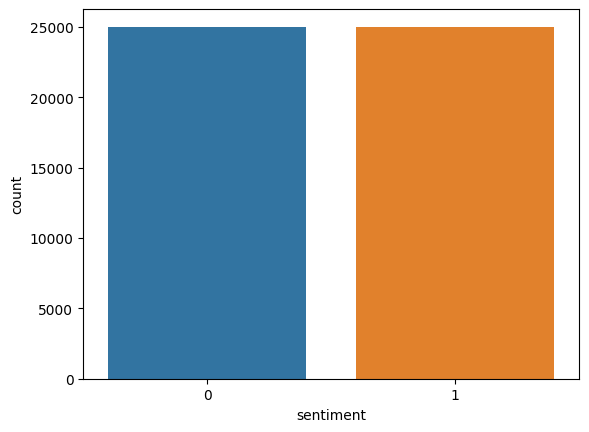

In [24]:
sns.countplot(base_dados, label = 'Contagem',x ='sentiment');

# Etapa 3: Função para pré-processamento dos textos

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
print(stop_words)

{'ambos', 'vão', 'ontem', 'fazes', 'daquela', 'terceiro', 'novos', 'naquele', 'fazem', 'diante', 'apenas', 'pelo', 'catorze', 'sei', 'ela', 'ambas', 'estas', 'ainda', 'posso', 'a', 'após', 'estivemos', 'usa', 'vós', 'vossos', 'lhe', 'sem', 'faço', 'tais', 'obrigada', 'ver', 'onde', 'aos', 'estás', 'todos', 'como', 'no', 'alguns', 'pegar', 'tem', 'vinte', 'outra', 'tipo', 'onze', 'dar', 'todas', 'conhecida', 'quando', 'seus', 'vezes', 'favor', 'fomos', 'sou', 'para', 'nunca', 'me', 'ao', 'boa', 'pela', 'tarde', 'maioria', 'atrás', 'mal', 'próxima', 'estava', 'agora', 'menor', 'tente', 'fazemos', 'toda', 'minha', 'ser', 'mesmo', 'quieta', 'fazia', 'direita', 'falta', 'baixo', 'nossa', 'fazeis', 'naquela', 'ponto', 'tanto', 'esse', 'pode', 'dessa', 'então', 'estiveram', 'for', 'enquanto', 'partir', 'quinto', 'meses', 'dezoito', 'quê', 'certamente', 'temos', 'seis', 'poder', 'ora', 'usar', 'sois', 'quanto', 'aqueles', 'numa', 'grandes', 'mil', 'do', 'estou', 'pelos', 'dizem', 'vêm', 'conse

In [ ]:
len(stop_words)

416

In [ ]:
#pln = spacy.load('pt')
pln = spacy.load("pt_core_news_sm")

In [ ]:
pln

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [ ]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [ ]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [ ]:
type(exemplo_base_dados)

list

In [ ]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [ ]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(exemplo_base_dados[0][1])

dict

In [ ]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_final)

196

In [ ]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
base_dados_final[0][0]

'trabalho agradável'

In [ ]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(base_dados_final[0][1])

dict

In [ ]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

# Etapa 5: Criação do classificador

In [ ]:
from spacy.training import Example

In [ ]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [ ]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.680004432797432}
{'textcat': 2.7620352185953045e-11}
{'textcat': 3.6104448152950858e-12}
{'textcat': 8.515259420434525e-13}
{'textcat': 3.0854944386158115e-13}
{'textcat': 1.2399335844095333e-13}
{'textcat': 5.713561473442465e-14}
{'textcat': 3.049847730421807e-14}
{'textcat': 1.4801541981876177e-14}
{'textcat': 8.209367621219018e-15}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.68000443e+00, 2.76203522e-11, 3.61044482e-12, 8.51525942e-13,
       3.08549444e-13, 1.23993358e-13, 5.71356147e-14, 3.04984773e-14,
       1.48015420e-14, 8.20936762e-15])

Text(0, 0.5, 'Erro')

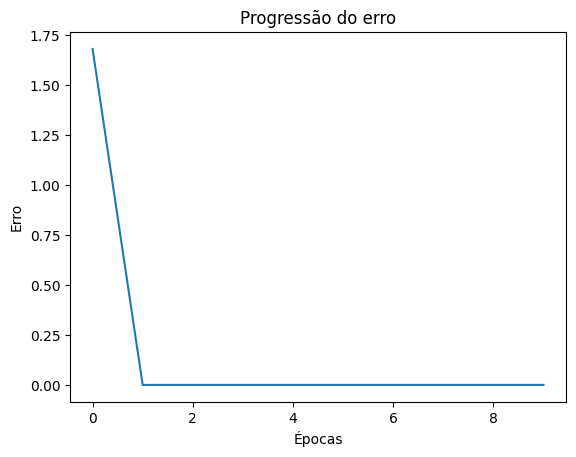

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [ ]:

%cd /content/gdrive/MyDrive

!ls

/content/gdrive/MyDrive
 20200503_192709.mp4
'2.1 - seplan estagio.pdf'
'2.2 - Lucas Morais recibo 2022.08 (Agosto) Outsmarting.pdf'
'2.2 - Lucas Rabelo recibo 2021.09 (setembro) AGENCIA IDEIA.pdf'
'3.6 - Declaração Bolsista - Lucas Rabelo de Araujo Morais (1).pdf'
'3.6 - Declaração Bolsista - Lucas Rabelo de Araujo Morais (2019).pdf'
'4.10 - PG_MAT_EVENTO_MINICURSO.pdf'
'4.10 - R_tidyverse.pdf'
'4.7 - 75_anos_covid_19_trab.pdf'
'4.7 - 75_anos_particip.pdf'
'4.7 - covid_19_cong2021.pdf'
'4.7 - hidreletric_cong_2021.pdf'
'4.7 - particp_cong_2021.pdf'
'4.8 - particip_cong2020.pdf'
'5.1 - Forecasting Paper cin.pdf'
'5.1 - Forecasting Paper.pdf'
'5.2 - Spatial Paper.pdf'
'6.7 - Lucas Rabelo EVENTO (1).pdf'
 Abstract.gdoc
 A-CONQUISTA-DA-MATEMATICA-MP-7_DIVULGACAO.pdf
 Addressing_Minor_Review.gdoc
 AJE-journal-cover-letter-template_Portuguese.gdoc
'Algoritmo Bootstrap tab2-exp.gdoc'
'Análises e resultados da tabela.gdoc'
'Anual-Estado de São Paulo.gsheet'
 Anual-Estado-SP.gsheet
'Apre

In [ ]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [ ]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [ ]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [ ]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [ ]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 4.811008924576754e-09}

In [ ]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 2.611803608942864e-07, 'MEDO': 0.9999997615814209}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [ ]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 2.2371914099039714e-08},
 {'ALEGRIA': 1.0, 'MEDO': 7.177111349676579e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.4668334991085885e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0243634324401683e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.658604447702828e-09},
 {'ALEGRIA': 1.0, 'MEDO': 6.9307604100288245e-09},
 {'ALEGRIA': 1.0, 'MEDO': 4.811008924576754e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.0811399775434438e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.613970278593115e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.111853270037045e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.6802656094560007e-08},
 {'ALEGRIA': 1.0, 'MEDO': 9.082466334575656e-09},
 {'ALEGRIA': 1.0, 'MEDO': 7.435932758426134e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.2379468944677683e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.4300740026083076e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.3358880224245695e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.536778673904564e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.231476165486356e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.3590994047140157e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.530805159357

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [ ]:

%cd /content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados

!ls

/content/gdrive/.shortcut-targets-by-id/1Rfu_9-UhtoUASY40rYd1YWlPWqFEqcBL/Machine Learning e Data Science com Python de A à Z/Bases de dados
AirPassengers.csv     credit_card_clients.csv  mercado.csv	   risco_credito_regras.arff
base_teste.txt	      credit_data.csv	       page_wikipedia.csv  risco_credito_regras.csv
base_treinamento.txt  credit_data_regras.csv   plano_saude2.csv    Twitter
census.csv	      credit.pkl	       plano_saude.csv	   yalefaces.zip
census.pkl	      house_prices.csv	       risco_credito.csv
census_regras.csv     mercado2.csv	       risco_credito.pkl


In [ ]:
data_dir = "/content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/base_teste.txt"


In [ ]:
base_dados_teste = pd.read_csv(data_dir, encoding = 'utf-8')

In [ ]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [ ]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.6309523809523809

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[31, 17],
       [14, 22]])